In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:

plt.style.use(['ggplot'])

__Create data with__

$$(\theta 0)=4
(\theta 1)=3$$

In [16]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

__Lets plot our data to check the relation between X and Y__

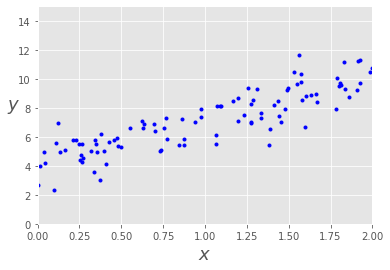

In [17]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])


# Analytical way of Linear Regression

In [25]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.09931461]
 [3.03078891]]


In [34]:
y_predict = X_b.dot(theta_best)

[0, 2, 0, 15]

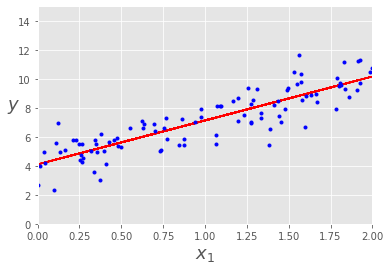

In [37]:

plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

# Gradient Descent

## Cost Function

### The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions


#### Cost

$$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

#### Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$

In [50]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = np.dot(X,theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [51]:

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

## Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [52]:
lr=0.01
n_iter=1000
theta=np.random.randn(2,1)
X_b=np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

In [53]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.675,
Theta1:          3.388
Final cost/MSE:  5448.739


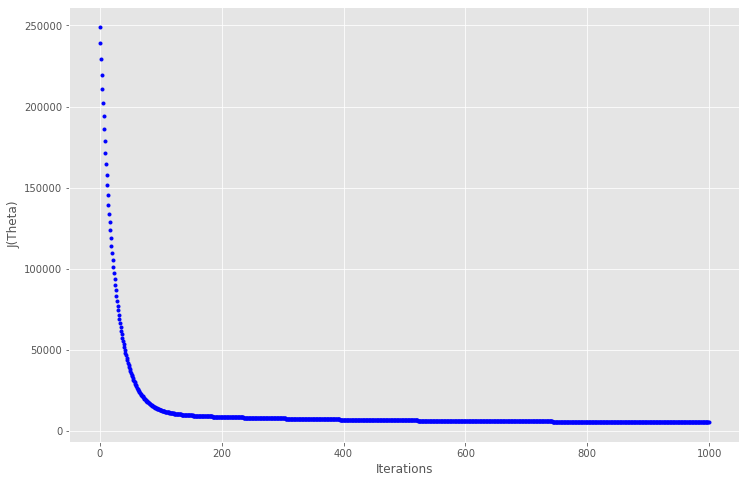

In [54]:

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')


#### It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much